## Chicago Crime Data

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v2.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

Identify the crime types that have a frequency >10,000. Provide a timeseries plot for all High Frequency Crime Types.

Plot all the crimes that come under High Frequency Crime Types on a map of Chicago. 

In [5]:
# Chicago Crime Data
from mpl_toolkits.basemap import Basemap
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

crimeData = pd.read_csv('chicago_crime_data.csv') #Import chicage crime data csv file as dataframes.
primeType = pd.read_csv('primary_type_id.csv') #Import prime crime type csv file as dataframes.

# Data Display
display(crimeData[:5])
display(primeType[:5])

,Crime_ID,Case Number,Date,Block,IUCR,Primary Type ID,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10496347,HZ237390,4/23/2016 16:55,001XX N PARKSIDE AVE,1310,7,TO PROPERTY,APARTMENT,False,False,...,29.0,25,14,1138578.0,1900413.0,2016,4/30/2016 15:51,41.882858,-87.766599,"(41.88285803, -87.766599362)"
1,10496348,HZ237355,4/23/2016 14:00,0000X E RIVERWALK S,820,32,$500 AND UNDER,SIDEWALK,False,False,...,42.0,32,6,1176778.0,1902518.0,2016,4/30/2016 15:51,41.887856,-87.626264,"(41.887856357, -87.626264274)"
2,10496349,HZ237341,4/23/2016 16:10,003XX W 35TH ST,495,3,AGGRAVATED OF A SENIOR CITIZEN,SPORTS ARENA/STADIUM,True,False,...,11.0,34,04B,1174431.0,1881739.0,2016,4/30/2016 15:51,41.830890,-87.635503,"(41.830890037, -87.635503335)"
3,10496350,HZ237330,4/23/2016 13:30,040XX N MAJOR AVE,031A,29,ARMED: HANDGUN,ALLEY,False,False,...,38.0,15,3,1137626.0,1926291.0,2016,4/30/2016 15:51,41.953887,-87.769470,"(41.953887423, -87.76947041)"
4,10496351,HZ237402,4/23/2016 16:45,084XX S DREXEL AVE,2820,25,TELEPHONE THREAT,RESIDENCE,False,True,...,8.0,44,26,1183692.0,1849271.0,2016,4/30/2016 15:51,41.741584,-87.602537,"(41.741583562, -87.602537135)"


,Primary Type,Primary Type ID
0,ARSON,1
1,ASSAULT,2
2,BATTERY,3
3,BURGLARY,4
4,CONCEALED CARRY LICENSE VIOLATION,5


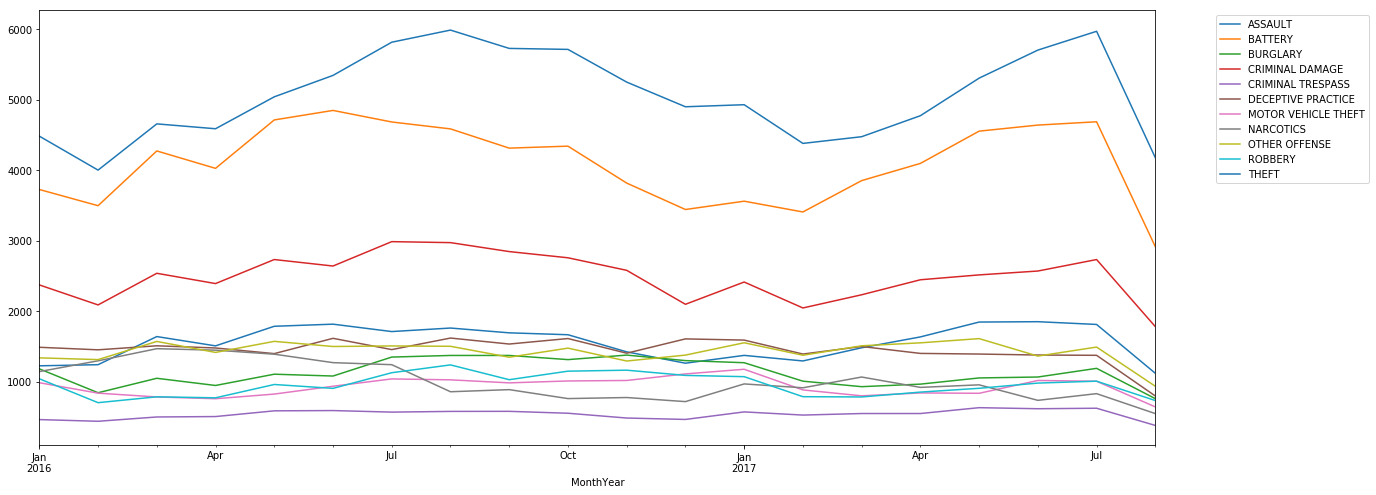

In [6]:
crimeData = crimeData.sort_values(by=['Crime_ID']) #Sort data by Crime_ID

mergeData = pd.merge(crimeData,primeType,on='Primary Type ID') # Merge the data from two files.
mergeDataFrame = pd.DataFrame(mergeData) #Convert into Data Frame.

temp = mergeDataFrame.groupby('Primary Type ID')

counts = mergeDataFrame['Primary Type ID'].value_counts() 
B = counts[counts>10000].count()
T=[]

# Loop for getting the crime frequency > 10000
for i in range(0,B):
    T += [counts[counts>10000].index[i]]
mergeDataFrame=mergeDataFrame.loc[mergeDataFrame['Primary Type ID'].isin(T)]
mergeDataFrame=mergeDataFrame.fillna(0) #Replace NaN values with 0s. So, for date time conversion it won't gave warning.

mergeDataFrame.Date = pd.to_datetime(mergeDataFrame.Date) #Convert to Date Time format
mergeDataFrame.dtypes

mergeDataFrame['MonthYear'] = mergeDataFrame.Date.dt.to_period('M') #Add a column to data frame for Month and Year


#Time Series using pivot table
#Create a pivot table for frequency of different crime types with the month and year.
Timeseries = mergeDataFrame.pivot_table('Primary Type ID', aggfunc=np.size, columns='Primary Type', index=mergeDataFrame.MonthYear)

fig, ax = plt.subplots(figsize=(20, 8))
Timeseries.plot(ax=ax)

plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.show()

From the above plot what we can see is, 'ASSAULT' crime has the highest crime rate from January 2016 to August 2017. And the lowest crime rate is of 'THEFT' crime.

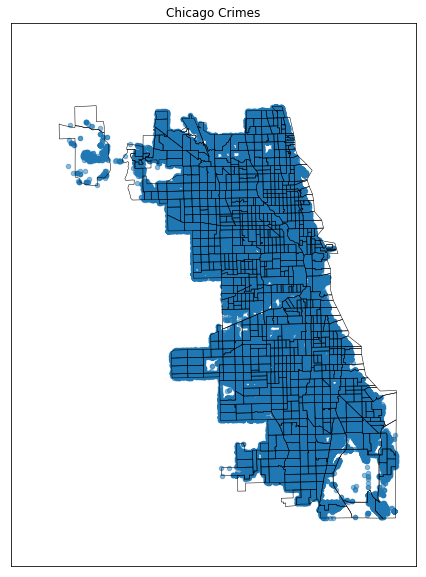

In [4]:
# Plotting crimes on Chicago map using Basemap
fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')

#Get the latitude and Longitude from the data frame and create two lists.
lat=mergeDataFrame['Latitude'].tolist()
lon=mergeDataFrame['Longitude'].tolist()

x,y = m(lon,lat)
plt.scatter(x,y,alpha=0.5,s=20)
plt.title("Chicago Crimes")
plt.show()